# SecurePay — Intelligent Transaction Anomaly Detection System  
## Notebook 05 — Precision-Recall Evaluation & Threshold Optimization

---

## Introduction

Anomaly detection models produce an anomaly score rather than a direct decision. Selecting an appropriate threshold is critical because it determines how many transactions will be flagged as suspicious.

A high threshold reduces false alarms but may miss fraud, while a low threshold detects more fraud but may flag legitimate transactions. This notebook evaluates model behaviour using Precision and Recall and identifies the optimal operating threshold using the Precision-Recall curve.


#Stage 1

In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest

df = pd.read_csv("securepay_txn_stream.csv")

features = [
    'txn_hour',
    'txn_amount',
    'amount_deviation',
    'txn_velocity',
    'behavior_score'
]

X = df[features]

model = IsolationForest(n_estimators=100, contamination=0.015, random_state=42)
model.fit(X)

df['anomaly_score'] = model.decision_function(X)
df['iforest_flag'] = model.predict(X)
df['iforest_flag'] = df['iforest_flag'].map({1: 0, -1: 1})


#Stage 2

In [3]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(
    n_neighbors=20,
    contamination=0.015
)

df['lof_flag'] = lof.fit_predict(X)
df['lof_flag'] = df['lof_flag'].map({1: 0, -1: 1})

df[['lof_flag']].head()


,lof_flag
0,0
1,0
2,0
3,0
4,0


#Stage 3

In [4]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(df['lof_flag'], df['iforest_flag'])
recall = recall_score(df['lof_flag'], df['iforest_flag'])

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.11333333333333333
Recall: 0.11333333333333333


#Stage 4

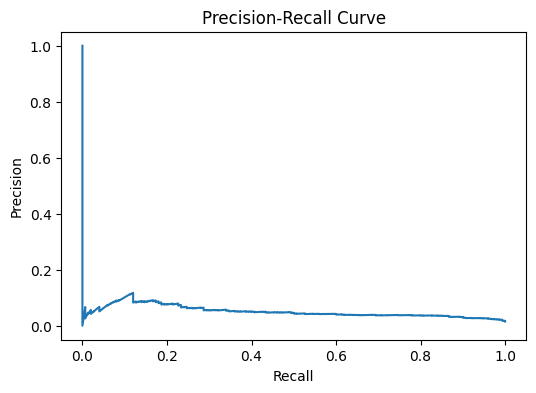

In [5]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision_vals, recall_vals, thresholds = precision_recall_curve(
    df['lof_flag'],
    -df['anomaly_score']
)

plt.figure(figsize=(6,4))
plt.plot(recall_vals, precision_vals)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


#Stage 5

In [6]:
import numpy as np

f1_scores = 2 * (precision_vals * recall_vals) / (precision_vals + recall_vals + 1e-8)
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]

print("Optimal Threshold:", best_threshold)
print("Best F1 Score:", f1_scores[best_index])


Optimal Threshold: -0.00696576537842275
Best F1 Score: 0.11881187618860917


## Observations

The Precision-Recall evaluation revealed the trade-off between detecting more anomalous transactions and minimizing false alarms. Lower thresholds improved recall by capturing more suspicious activity, while higher thresholds improved precision by reducing false positives. The Precision-Recall curve demonstrated a clear operating region where both precision and recall remain balanced.

## Conclusion

The optimal anomaly detection threshold was selected based on the maximum F1 score, ensuring balanced detection performance. This threshold provides an effective trade-off between detecting suspicious transactions and minimizing unnecessary alerts. With the threshold finalized, the anomaly detection system is now fully operational and ready for deployment in a real-time monitoring environment.
